In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

# Multi class classification

## 4 classes specified by passing 4 to the centers argument 

In [3]:
data = make_blobs(n_samples=500, n_features=5, centers=4, cluster_std=4, random_state=101)

In [4]:
type(data)

tuple

In [5]:
df_feat = pd.DataFrame(data[0], columns=['feature_' + str(i) for i in range(5)])

In [6]:
df_feat

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.428540,-4.590813,-5.197088,0.850302,5.714541
1,-10.514609,-6.233426,5.418929,9.608892,-3.077988
2,-8.607164,-6.427502,2.547316,3.857882,-0.638965
3,-9.009029,-1.484229,2.237023,0.501287,-8.987792
4,6.583417,-9.575847,-6.841777,5.856340,15.228113
...,...,...,...,...,...
495,-5.605992,1.598273,-11.321224,6.468432,16.150225
496,0.981713,-5.794576,-5.822217,9.681262,6.369389
497,0.345788,-5.852270,5.008501,-2.691871,-4.461119
498,0.693136,-11.724977,-8.581436,3.893372,7.820085


In [7]:
y = data[1]

In [9]:
y

array([0, 3, 3, 3, 2, 1, 3, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 3, 0, 0,
       1, 0, 2, 3, 1, 2, 0, 1, 2, 3, 1, 3, 3, 2, 0, 0, 0, 3, 2, 3, 0, 2,
       0, 3, 1, 0, 1, 0, 3, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 3,
       0, 2, 3, 0, 2, 1, 1, 1, 3, 1, 2, 2, 3, 2, 2, 0, 1, 0, 0, 3, 0, 3,
       0, 2, 3, 1, 1, 0, 1, 0, 3, 1, 3, 0, 3, 3, 2, 2, 3, 0, 2, 0, 0, 1,
       0, 2, 0, 3, 3, 0, 1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 0, 3, 2, 2, 0, 0,
       1, 0, 1, 3, 1, 3, 2, 0, 2, 1, 3, 1, 2, 0, 0, 0, 0, 3, 2, 1, 3, 1,
       3, 1, 2, 2, 1, 2, 0, 1, 3, 1, 1, 3, 0, 3, 3, 3, 2, 2, 0, 2, 0, 2,
       1, 2, 1, 0, 0, 2, 1, 2, 2, 3, 1, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 3,
       1, 1, 3, 3, 2, 2, 2, 2, 1, 2, 0, 3, 1, 3, 1, 2, 1, 0, 2, 2, 2, 2,
       3, 3, 2, 1, 2, 2, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 3, 1, 0, 1, 2, 1, 1, 1, 1, 3, 3, 0, 2, 1, 1,
       0, 2, 0, 3, 0, 3, 0, 2, 1, 2, 1, 2, 3, 1, 3, 3, 2, 2, 3, 1, 3, 3,
       3, 1, 1, 2, 0, 3, 3, 3, 3, 1, 0, 0, 2, 1, 2,

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
X = df_feat

In [12]:
scaler = MinMaxScaler()

In [13]:
X = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.93      0.98      0.96        44
           2       0.80      0.87      0.84        38
           3       0.96      0.77      0.86        31

    accuracy                           0.89       150
   macro avg       0.89      0.88      0.88       150
weighted avg       0.89      0.89      0.89       150



In [22]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    

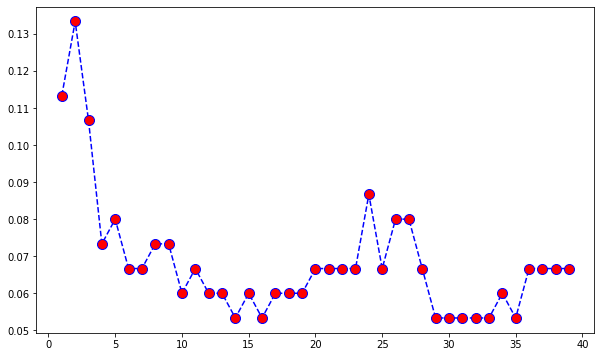

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', markersize=10,  markerfacecolor='red', marker='o')

In [24]:
len(pred_i)

150

In [25]:
len(y_test)

150

In [26]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [27]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.91      0.98      0.94        43
           2       0.93      1.00      0.96        38
           3       0.96      0.80      0.87        30

    accuracy                           0.95       150
   macro avg       0.95      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150



In [28]:
df_feat

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.428540,-4.590813,-5.197088,0.850302,5.714541
1,-10.514609,-6.233426,5.418929,9.608892,-3.077988
2,-8.607164,-6.427502,2.547316,3.857882,-0.638965
3,-9.009029,-1.484229,2.237023,0.501287,-8.987792
4,6.583417,-9.575847,-6.841777,5.856340,15.228113
...,...,...,...,...,...
495,-5.605992,1.598273,-11.321224,6.468432,16.150225
496,0.981713,-5.794576,-5.822217,9.681262,6.369389
497,0.345788,-5.852270,5.008501,-2.691871,-4.461119
498,0.693136,-11.724977,-8.581436,3.893372,7.820085


In [29]:
labels = pd.DataFrame(data=y, columns=['Labels'])

In [30]:
df = pd.concat([df_feat, labels], axis=1)

In [31]:
import random
random.seed(2)

random_num = random.randint(0, len(df))
print(str(random_num) + '\n')


prediction = knn.predict(scaler.transform(np.array(df.iloc[random_num][:-1]).reshape(-1, 5)))[0]

print('KNN model predicts the data point is of class {}'.format(prediction))

489

KNN model predicts the data point is of class 1


In [32]:
df.iloc[489]

feature_0    7.375723
feature_1   -1.525657
feature_2    6.894818
feature_3    8.595100
feature_4   -3.684275
Labels       1.000000
Name: 489, dtype: float64

In [33]:
knn.predict_proba(scaler.transform(np.array(df.iloc[random_num][:-1]).reshape(-1, 5)))

array([[0., 1., 0., 0.]])

# Class options accessed via the classes_ attribute

In [34]:
knn.classes_

array([0, 1, 2, 3])